# import Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

# Read the Training Data

In [2]:
file_path = r"C:\Users\lenovo i3\OneDrive\Documents\Project Data\Compus x project\filght-price-prediction\dataset\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-06,Delhi,Cochin,05:30:00,19:45:00,2295,2.0,In-flight meal not included,15864
1,Indigo,2019-05-06,Banglore,Delhi,13:00:00,15:50:00,170,0.0,No Info,3943
2,Multiple Carriers,2019-04-27,Delhi,Cochin,07:10:00,16:10:00,540,1.0,In-flight meal not included,6093
3,Jet Airways,2019-03-21,Delhi,Cochin,18:20:00,18:50:00,1470,2.0,No Info,12604
4,Air India,2019-03-09,Delhi,Cochin,08:00:00,19:15:00,675,1.0,No Info,16754
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-03-01,Banglore,New Delhi,08:50:00,23:25:00,875,2.0,1 Short layover,26743
636,Jet Airways,2019-06-24,Delhi,Cochin,21:50:00,19:00:00,1270,1.0,In-flight meal not included,10262
637,Jet Airways,2019-03-06,Delhi,Cochin,19:45:00,19:45:00,1440,1.0,No Info,17024
638,Spicejet,2019-04-15,Kolkata,Banglore,17:10:00,19:40:00,150,0.0,No check-in baggage included,3841


## 2.1 Fixing Data Types

In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

# 3. High-level Summary of Data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [6]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,634.156250,0.804688,8886.212500
std,503.010257,0.650732,4345.567073
min,75.000000,0.000000,1759.000000
25%,175.000000,0.000000,5176.750000
50%,512.500000,1.000000,8161.000000
75%,925.000000,1.000000,12037.000000
max,2315.000000,3.000000,31825.000000


In [7]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,6
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,224,267,267,351.0,487


# 4. High-level analysis of Missing Data

In [8]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


# 5. High-level analysis of Outlier

In [9]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [10]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-29 05:30:00,2024-05-29 19:45:00,2295,2.0,In-flight meal not included,15864,-1
3,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-29 18:20:00,2024-05-29 18:50:00,1470,2.0,No Info,12604,-1
8,Spicejet,2019-06-21,Chennai,Kolkata,2024-05-29 08:20:00,2024-05-29 10:35:00,135,0.0,No check-in baggage included,3543,-1
14,Spicejet,2019-03-27,Mumbai,Hyderabad,2024-05-29 22:45:00,2024-05-29 00:10:00,85,0.0,No Info,1759,-1
18,Jet Airways,2019-05-21,Delhi,Cochin,2024-05-29 09:40:00,2024-05-29 04:25:00,1125,2.0,In-flight meal not included,13029,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Jet Airways,2019-06-15,Delhi,Cochin,2024-05-29 05:30:00,2024-05-29 19:00:00,810,2.0,In-flight meal not included,10368,-1
627,Indigo,2019-06-24,Mumbai,Hyderabad,2024-05-29 19:05:00,2024-05-29 20:35:00,90,0.0,No Info,2754,-1
634,Indigo,2019-03-06,Chennai,Kolkata,2024-05-29 11:35:00,2024-05-29 14:00:00,145,0.0,No Info,7295,-1
635,Air India,2019-03-01,Banglore,New Delhi,2024-05-29 08:50:00,2024-05-29 23:25:00,875,2.0,1 Short layover,26743,-1


# 6. Pair Plot

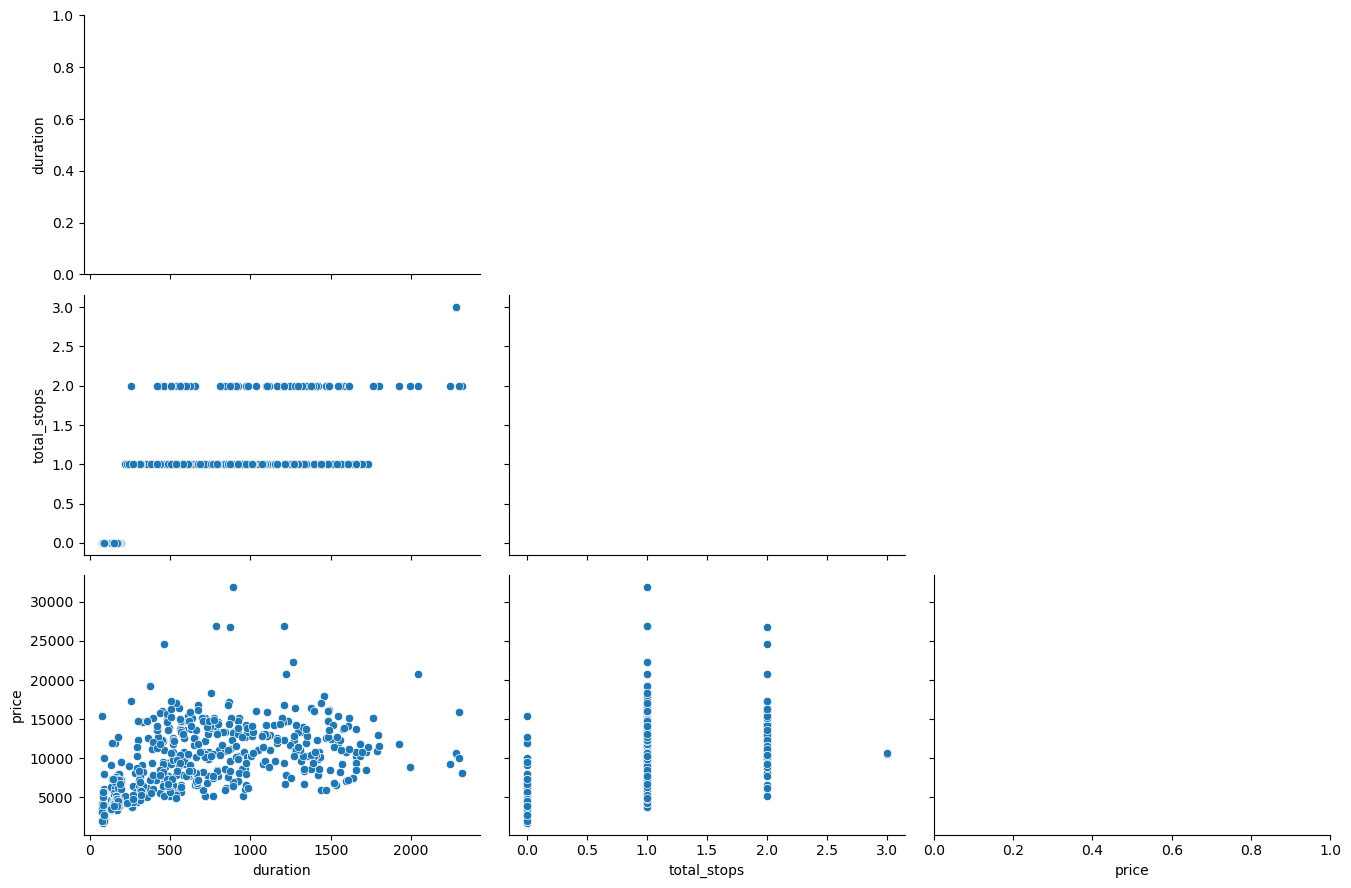

In [11]:
eda_helper_functions.pair_plots(train)

# 7. Correlation Plot Analysis

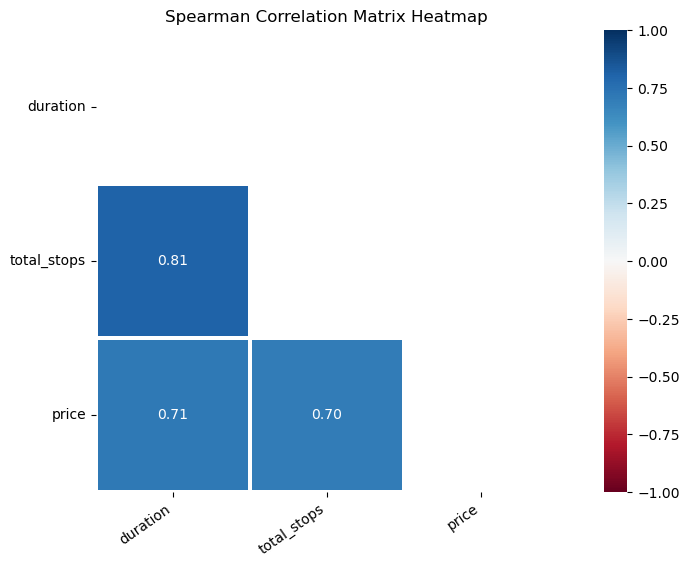

In [12]:
eda_helper_functions.correlation_heatmap(train)

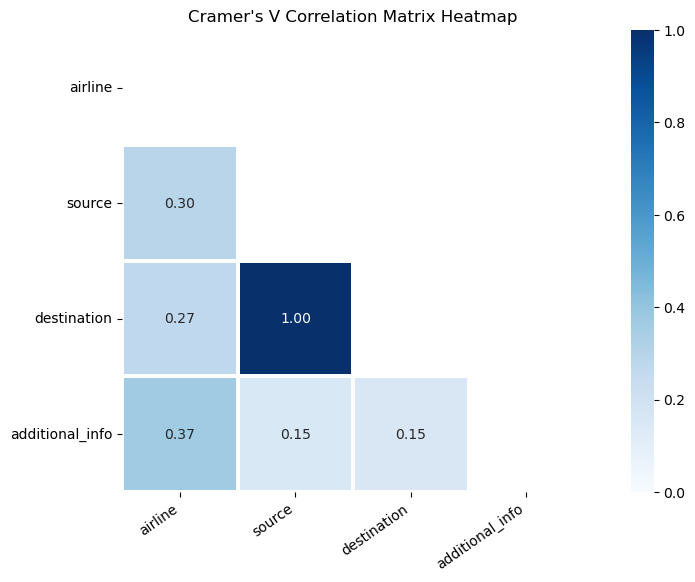

In [13]:
eda_helper_functions.cramersV_heatmap(train)

# 8. Detailed Analysis

In [14]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

## 8.1 Airline

In [15]:
train.airline

0            Jet Airways
1                 Indigo
2      Multiple Carriers
3            Jet Airways
4              Air India
             ...        
635            Air India
636          Jet Airways
637          Jet Airways
638             Spicejet
639                Goair
Name: airline, Length: 640, dtype: object

In [16]:
eda_helper_functions.cat_summary(train, "airline")

0            Jet Airways
1                 Indigo
2      Multiple Carriers
3            Jet Airways
4              Air India
             ...        
635            Air India
636          Jet Airways
637          Jet Airways
638             Spicejet
639                Goair
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,224


,count,percentage
category,,
Jet Airways,224,0.350000
Indigo,118,0.184375
Air India,110,0.171875
Multiple Carriers,83,0.129688
Spicejet,56,0.087500
Vistara,25,0.039062
Air Asia,14,0.021875
Goair,10,0.015625


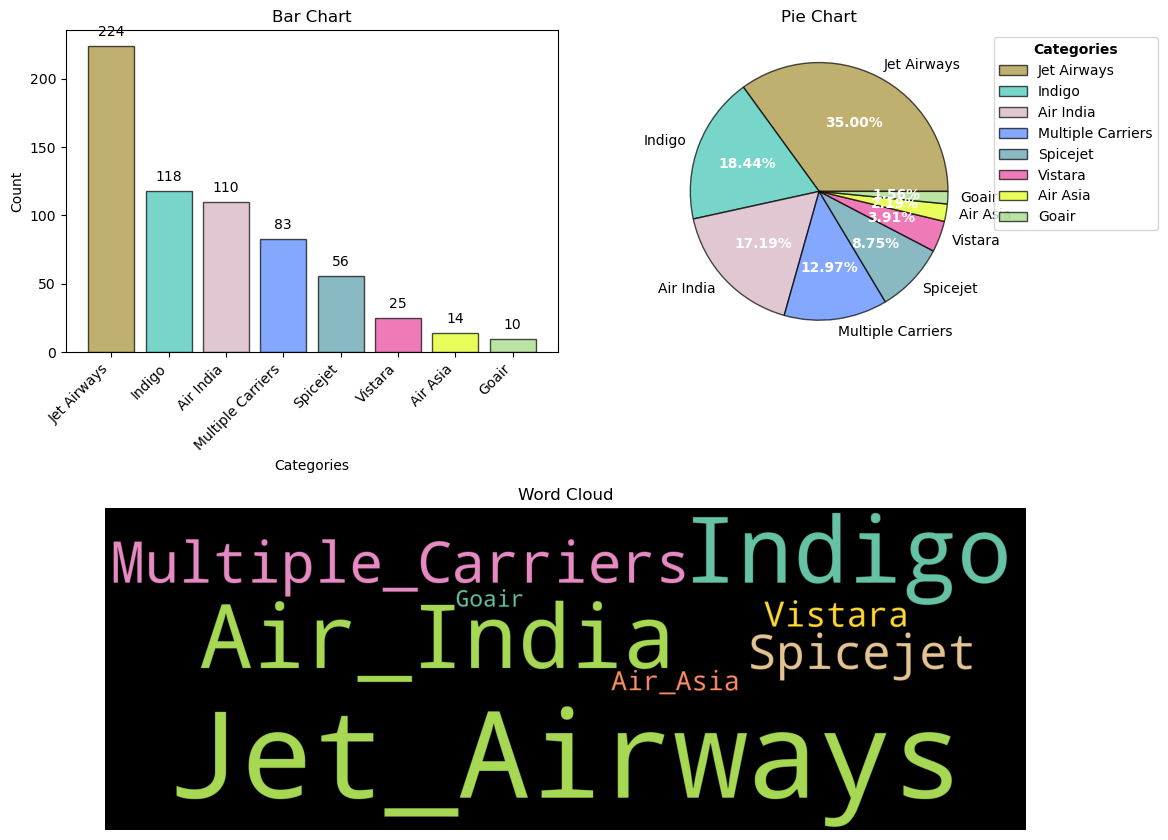

In [17]:
eda_helper_functions.cat_univar_plots(train, "airline")

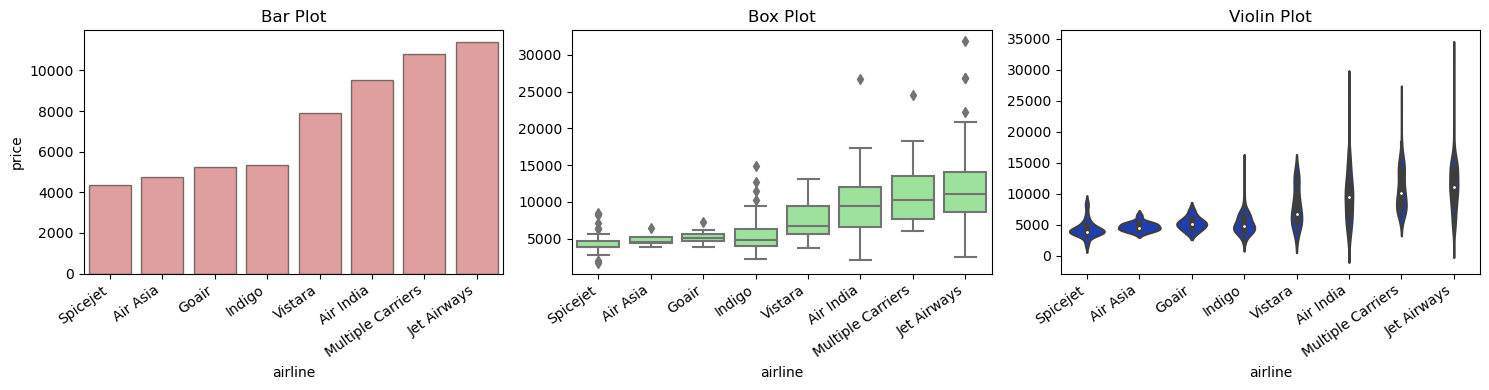

In [18]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [19]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 59.51726703598225
- p-value              : 1.7692740417358267e-65
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 307.8828283186676
- p-value              : 1.2530542258627996e-62
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


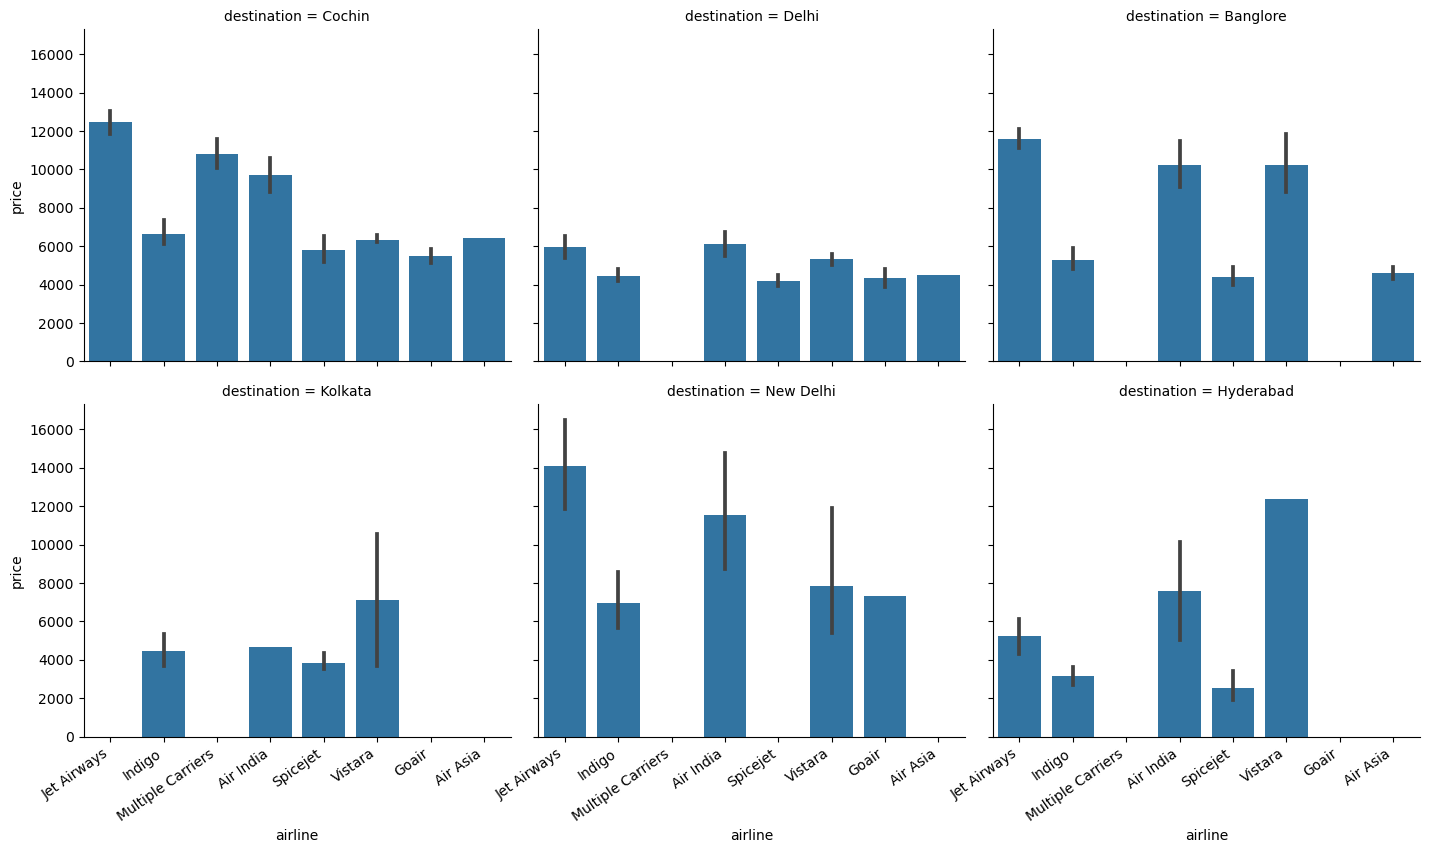

In [20]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

## 8.2 date_of_journey

In [21]:
train.date_of_journey

0     2019-03-06
1     2019-05-06
2     2019-04-27
3     2019-03-21
4     2019-03-09
         ...    
635   2019-03-01
636   2019-06-24
637   2019-03-06
638   2019-04-15
639   2019-06-12
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

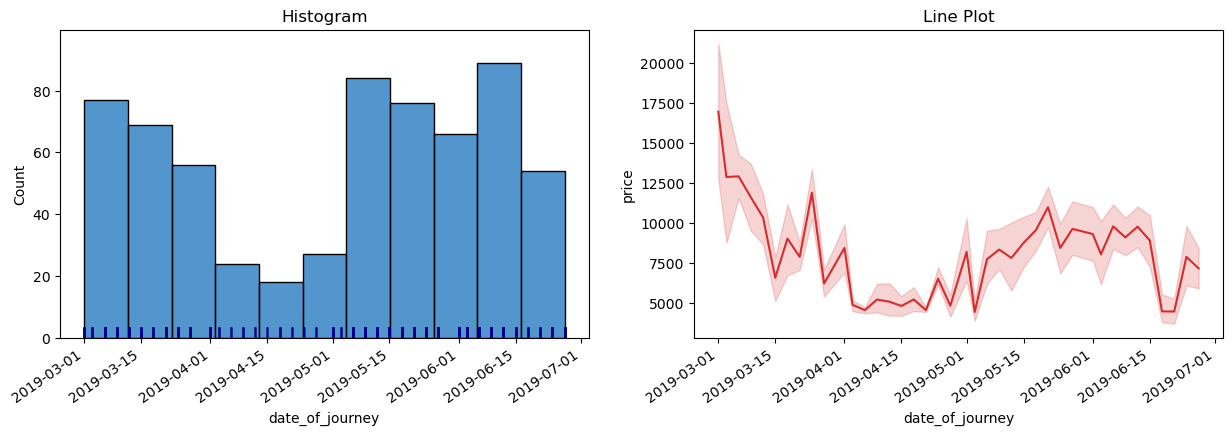

In [22]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

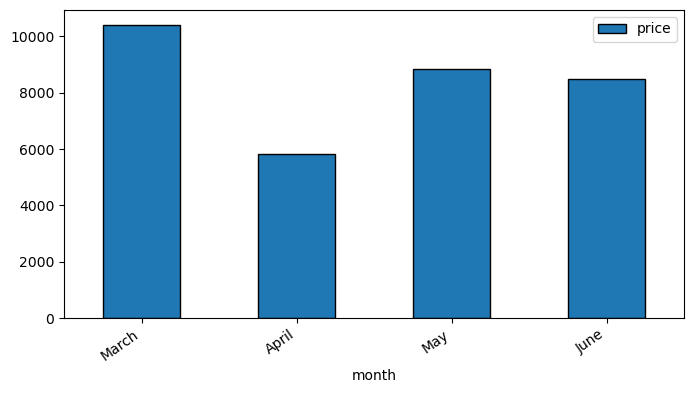

In [23]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

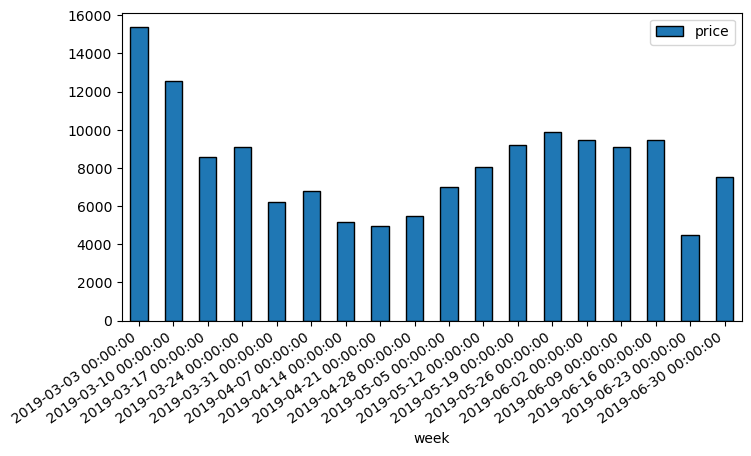

In [24]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

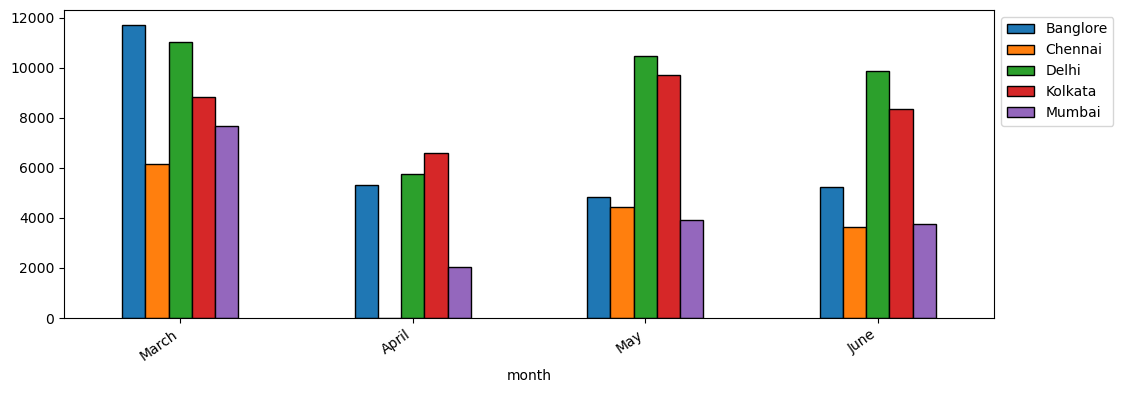

In [25]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

## 8.3 dep_time

In [26]:
train.dep_time

0     2024-05-29 05:30:00
1     2024-05-29 13:00:00
2     2024-05-29 07:10:00
3     2024-05-29 18:20:00
4     2024-05-29 08:00:00
              ...        
635   2024-05-29 08:50:00
636   2024-05-29 21:50:00
637   2024-05-29 19:45:00
638   2024-05-29 17:10:00
639   2024-05-29 10:35:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

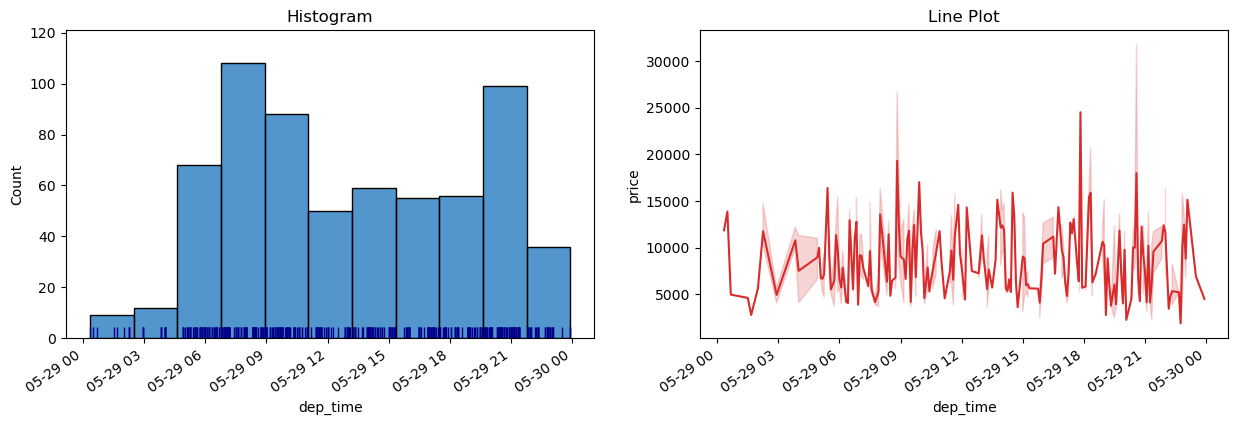

In [27]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

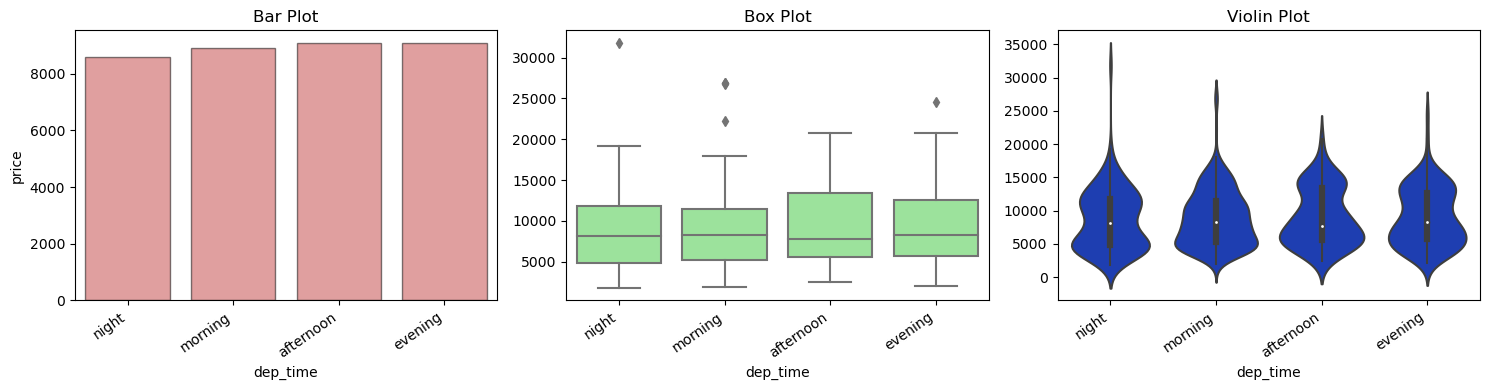

In [28]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

## 8.4 duration

In [29]:
eda_helper_functions.num_summary(train, "duration")

0      2295
1       170
2       540
3      1470
4       675
       ... 
635     875
636    1270
637    1440
638     150
639     540
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,175.0
50,512.5
75,925.0
90,1421.0
95,1595.0
99,2025.5


,value
mean,634.156250
trimmed mean (5%),598.715278
trimmed mean (10%),571.328125
median,512.500000


,value
var,253019.318271
std,503.010257
IQR,750.000000
mad,342.500000
coef_variance,0.793196


,value
skewness,0.927730
kurtosis,0.098415


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 3.749730481841133e-21
Test Statistic       : 0.8877674341201782
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 22.829368179302946
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [30]:
train.duration.quantile([0.24, 0.5, 0.75])

0.24    170.0
0.50    512.5
0.75    925.0
Name: duration, dtype: float64

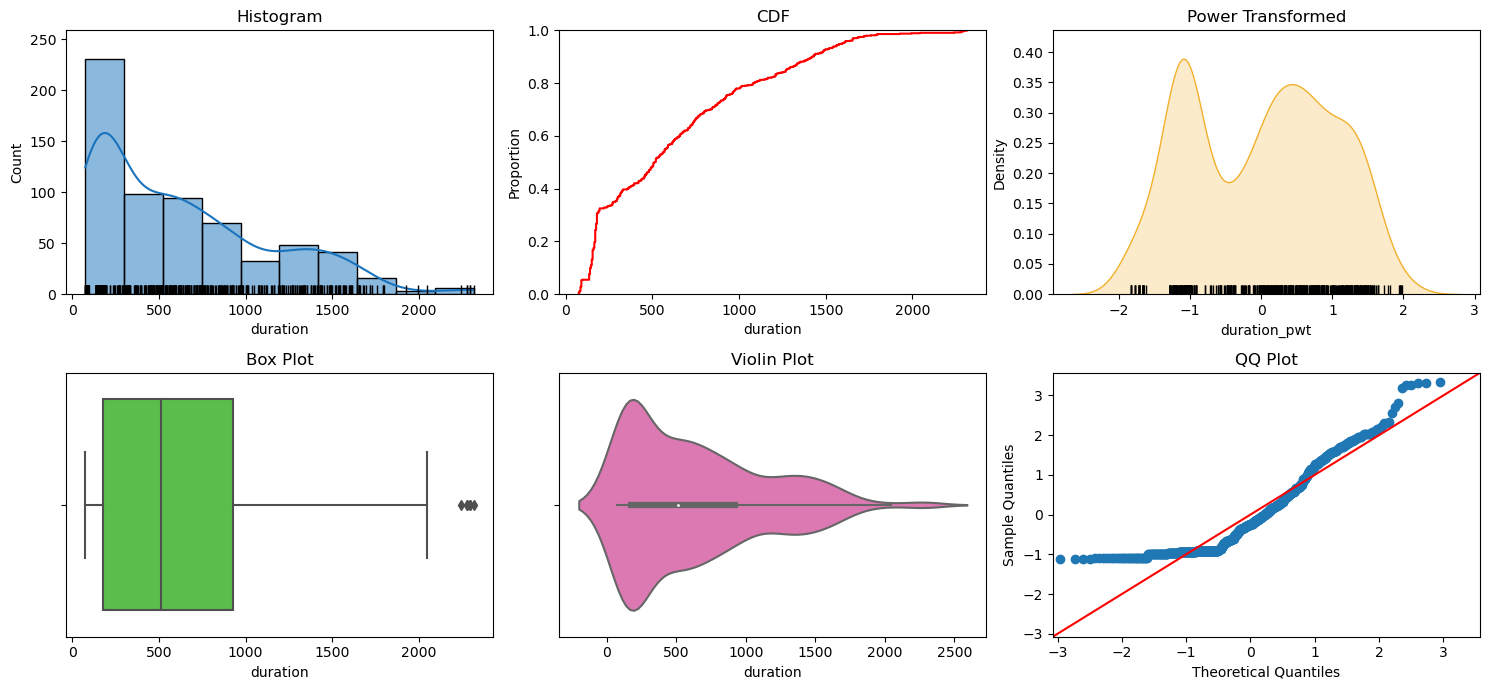

In [32]:
eda_helper_functions.num_univar_plots(train, "duration")

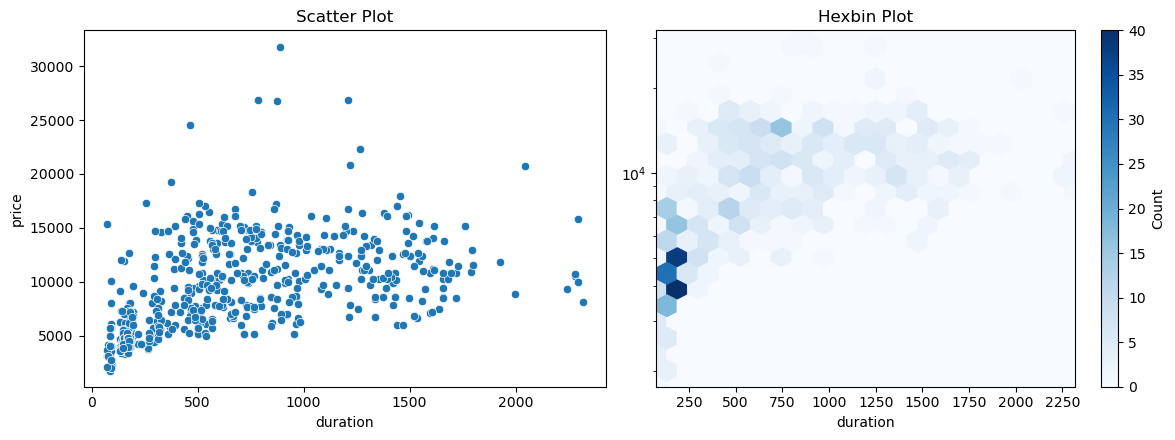

In [33]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=20,
        cmap= "Blues"
    )
)

In [34]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5538681615226404
- p-value              : 9.870045481650382e-53
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7140153274401877
- p-value              : 7.39658676674293e-101
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


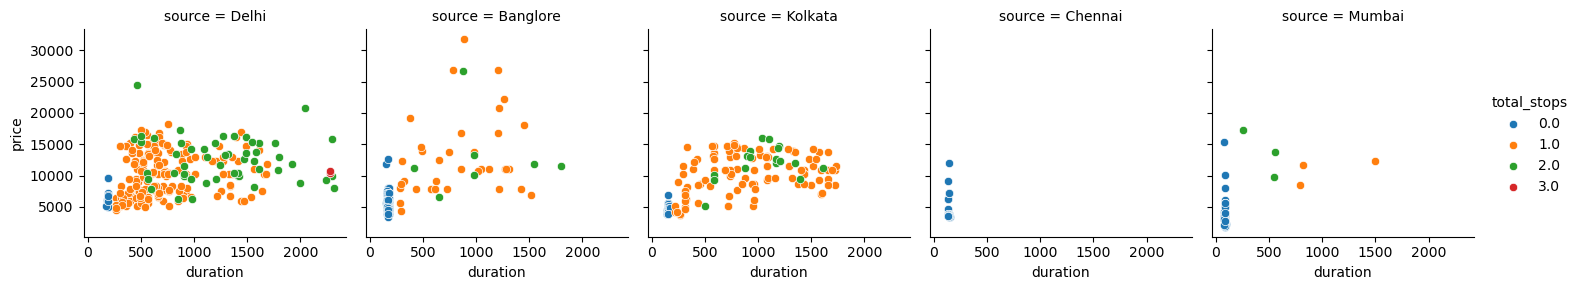

In [35]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

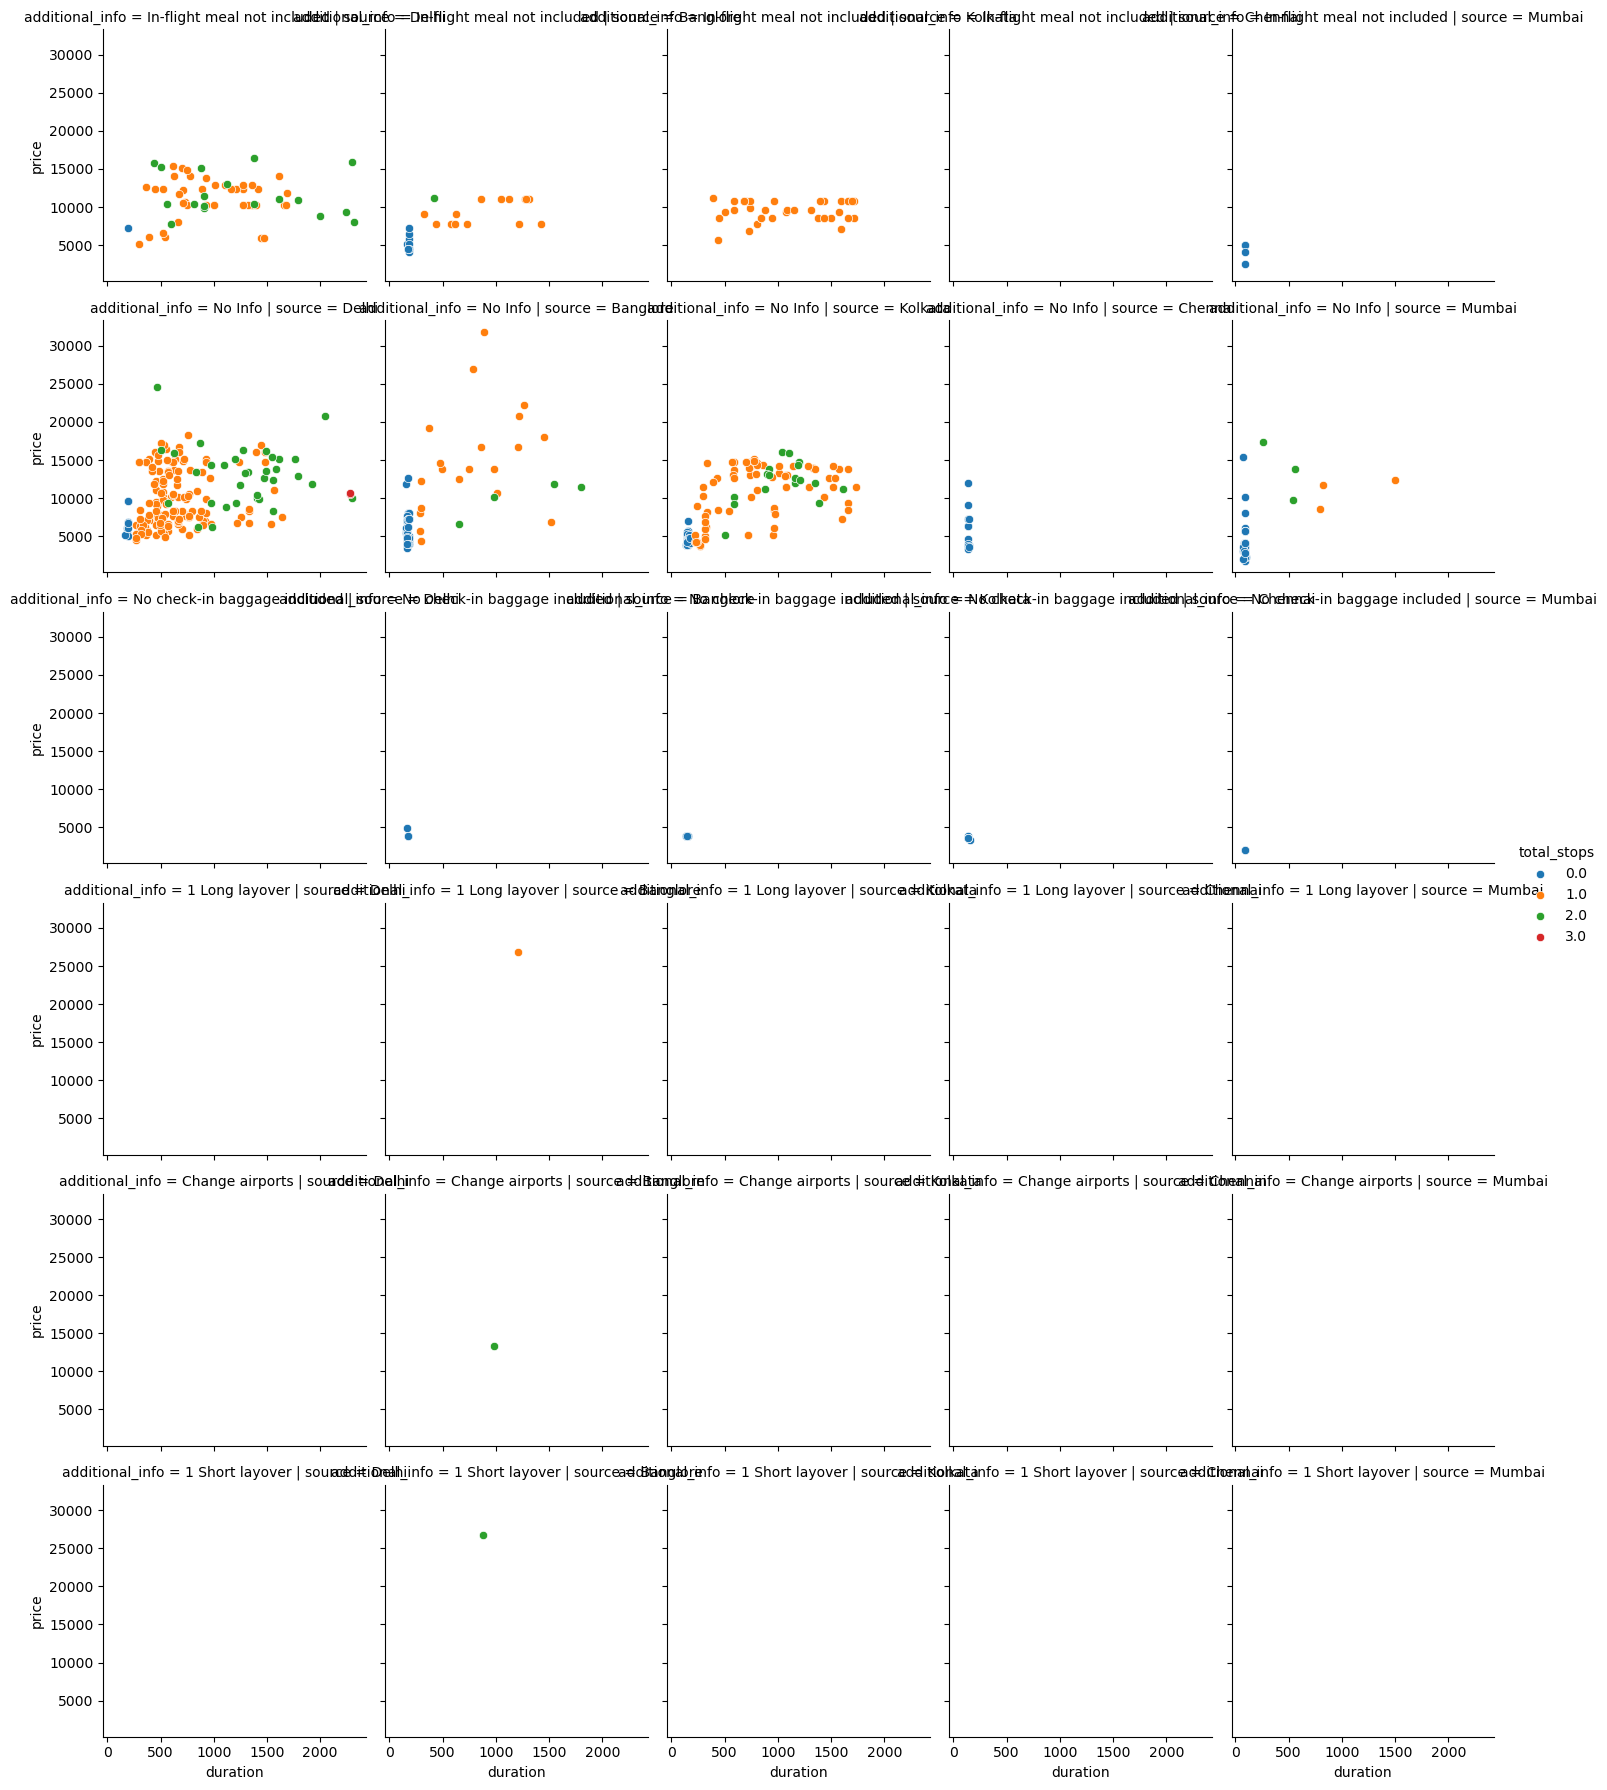

In [36]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [37]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -950.0
Upper Limit : 2050.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
595,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-29 05:30:00,2024-05-29 18:50:00,2240,2.0,In-flight meal not included,9328
202,Air India,2019-06-24,Delhi,Cochin,2024-05-29 05:15:00,2024-05-29 19:15:00,2280,3.0,No Info,10493
286,Air India,2019-06-27,Delhi,Cochin,2024-05-29 05:15:00,2024-05-29 19:15:00,2280,3.0,No Info,10703
0,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-29 05:30:00,2024-05-29 19:45:00,2295,2.0,In-flight meal not included,15864
432,Air India,2019-05-21,Delhi,Cochin,2024-05-29 05:00:00,2024-05-29 19:15:00,2295,2.0,No Info,9968
272,Jet Airways,2019-03-27,Delhi,Cochin,2024-05-29 05:10:00,2024-05-29 19:45:00,2315,2.0,In-flight meal not included,8098


## 8.5 additional_info

In [39]:
eda_helper_functions.cat_summary(train, "additional_info")

0       In-flight meal not included
1                           No Info
2       In-flight meal not included
3                           No Info
4                           No Info
                   ...             
635                 1 Short layover
636     In-flight meal not included
637                         No Info
638    No check-in baggage included
639                         No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 6 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,6
top,No Info
freq,487


,count,percentage
category,,
No Info,487,0.760938
In-flight meal not included,131,0.204687
No check-in baggage included,19,0.029687
1 Long layover,1,0.001563
Change airports,1,0.001563
1 Short layover,1,0.001563


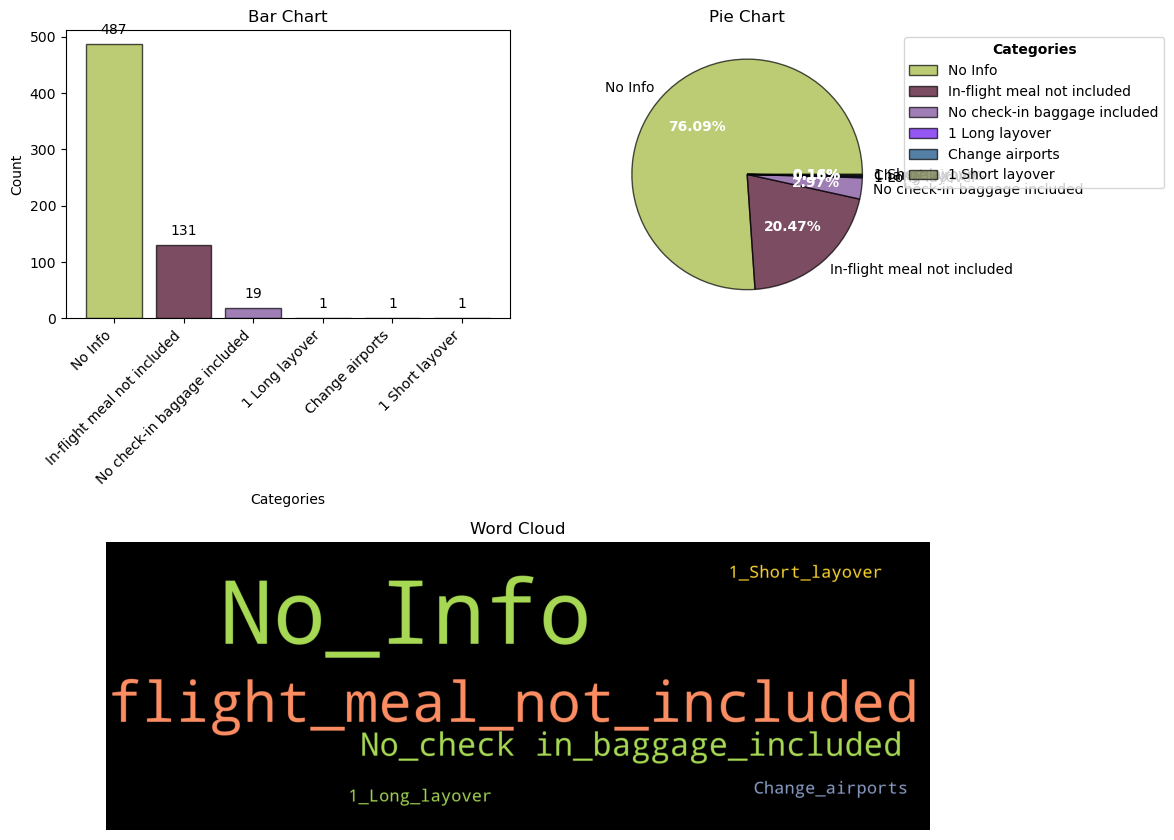

In [40]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

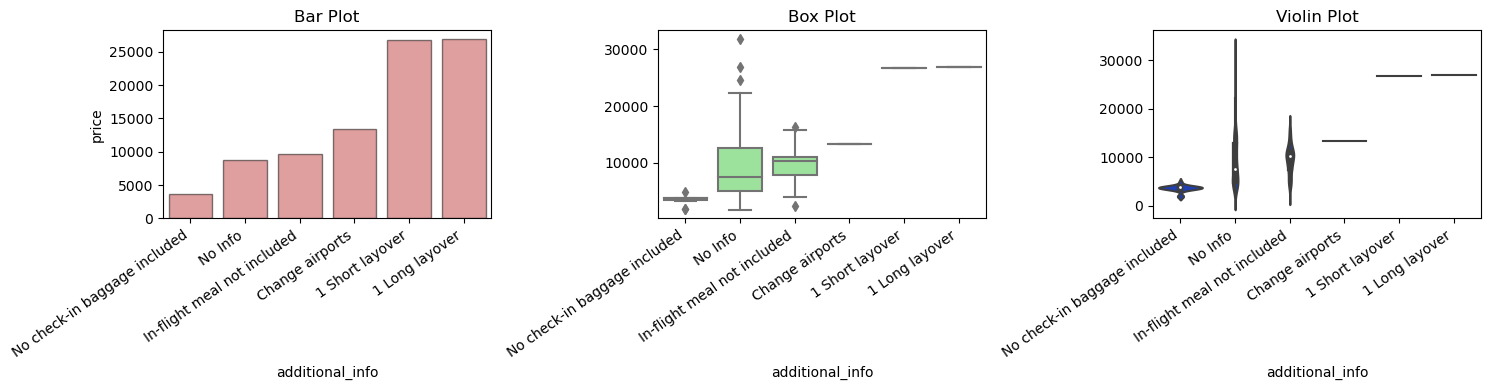

In [41]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

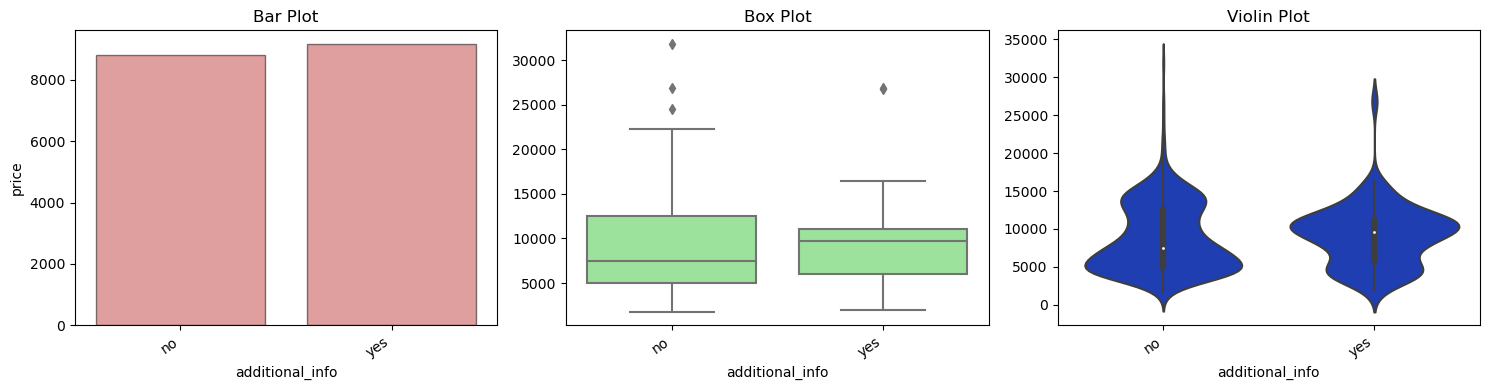

In [42]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

* `additional_info` has severaly rare categories
* Converted it into a binary feature for futher analysis